# Insurance Forecast using Regression Algorithms

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import  train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import  RandomForestRegressor

In [3]:
med_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [4]:
med_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
med_df.shape

(1338, 7)

# Checking Null values in the dataset

In [6]:
med_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
med_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
med_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

# Making a dataframe for the Norminal data

In [9]:
med_df_norminal =med_df[['sex','smoker','region','children']].copy()

In [10]:
med_df_norminal.columns

Index(['sex', 'smoker', 'region', 'children'], dtype='object')

# Visualising the Data

male      676
female    662
Name: sex, dtype: int64


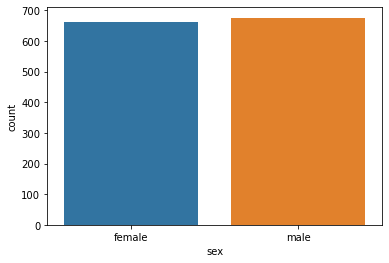

In [11]:
ax = sns.countplot(x='sex', data=med_df_norminal)
print(med_df_norminal['sex'].value_counts())

The above shows a total number of males as 676 and total number of females 662, there is no significant differnce in the values

no     1064
yes     274
Name: smoker, dtype: int64


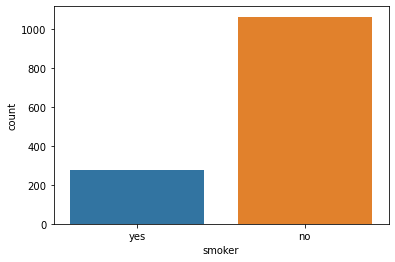

In [12]:
ax = sns.countplot(x = 'smoker', data= med_df_norminal)
print(med_df_norminal['smoker'].value_counts())

For the smoker columns there is a significant difference between the smokers and non smokers with 274 as people who smokes and 1064 for people who do not smoke

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


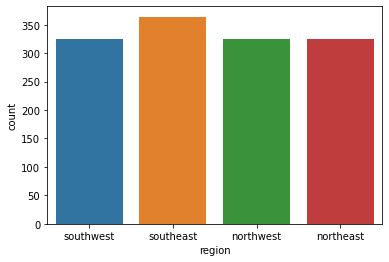

In [13]:
ax = sns.countplot(x ='region',data=med_df_norminal)
print(med_df_norminal['region'].value_counts())

For the region column, people who live in southeast appear to have the greatest count of 350, and 325 for people in southwest, northwest and northeast, here the differece is not significant

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


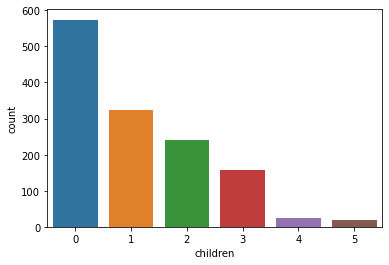

In [14]:
ax = sns.countplot(x ='children',data=med_df_norminal)
print(med_df_norminal['children'].value_counts())

For the children column a high number of people do not have children, very few have 4 and 5 children and the rest range from 1 child to 3 children

# Making a dataframe of ordinal data

In [15]:
med_ordinal = med_df[['bmi']].copy()

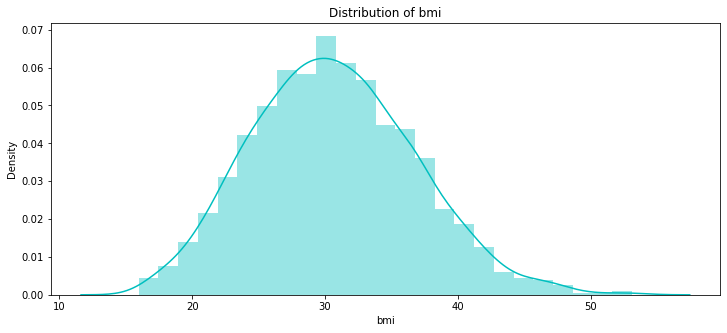

In [66]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(med_df["bmi"], color = 'c')

For the bmi column, majority have bmi ranging from 25 to 40 with few below 25 and above 50

# Checking the distribution of the continuous value of the float type columns

In [17]:
med_continous = med_df[['charges']].copy()

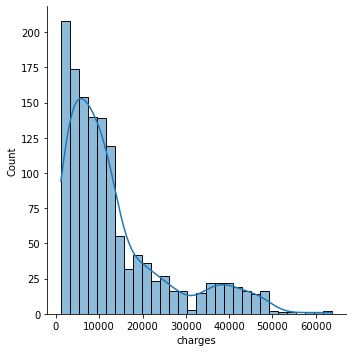

In [18]:
sns.displot(med_continous['charges'],kde=True)

In [50]:
med_df[(med_df.smoker == 1)]

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
11,62,0.0,26.290,0,1.0,2.0,27808.72510
14,27,1.0,42.130,0,1.0,2.0,39611.75770
19,30,1.0,35.300,0,1.0,3.0,36837.46700
23,34,0.0,31.920,1,1.0,0.0,37701.87680
...,...,...,...,...,...,...,...
1313,19,0.0,34.700,2,1.0,3.0,36397.57600
1314,30,0.0,23.655,3,1.0,1.0,18765.87545
1321,62,1.0,26.695,0,1.0,0.0,28101.33305
1323,42,0.0,40.370,2,1.0,2.0,43896.37630


# Encoding of Dataframe
we will encode the data because of the string values in the data set

In [19]:
enc = OrdinalEncoder()

In [20]:
for i in med_df.columns:
    if med_df[i].dtypes == 'object':
        med_df[i]=enc.fit_transform(med_df[i].values.reshape(-1,1))

In [21]:
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


### Checking the distribution of the feature columns with the target column

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

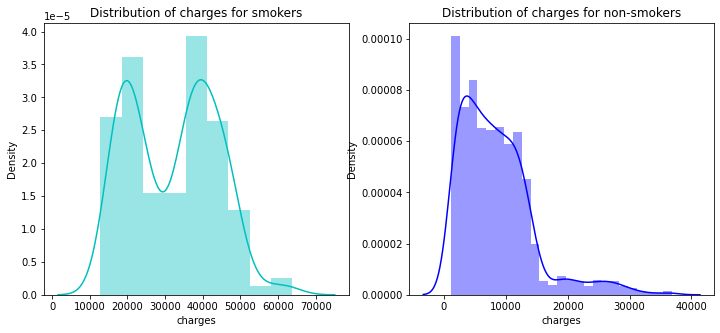

In [56]:
plot = plt.figure(figsize=(12,5))

ax=plot.add_subplot(121)
sns.distplot(med_df[(med_df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=plot.add_subplot(122)
sns.distplot(med_df[(med_df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

fromm the above, smoking people spend more on insurance

<AxesSubplot:title={'center':'Box plot for charges of males'}, xlabel='charges', ylabel='smoker'>

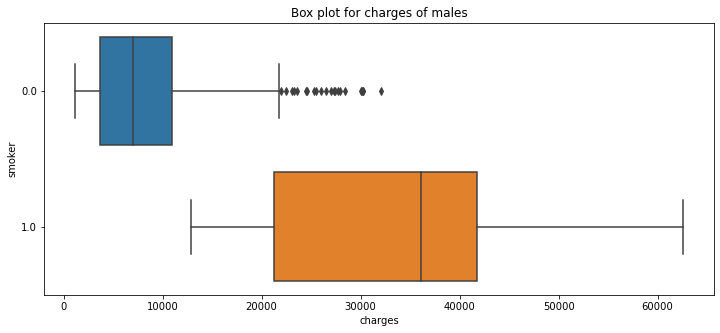

In [63]:
plt.figure(figsize=(12,5)) #boxplot of charges of smoking and non smoking males
plt.title("Box plot for charges of males")
sns.boxplot(y="smoker", x="charges", data =  med_df[(med_df.sex == 1)] , orient="h")

<AxesSubplot:title={'center':'Box plot for charges of females'}, xlabel='charges', ylabel='smoker'>

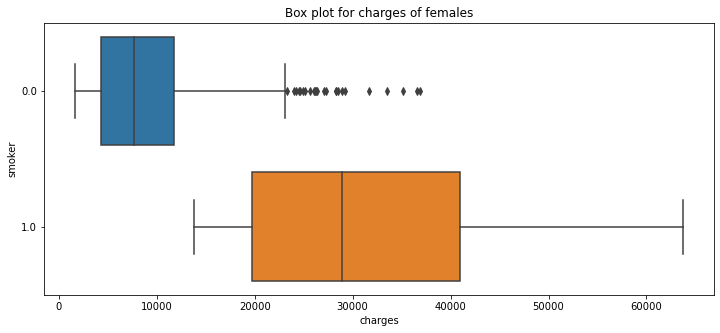

In [62]:
plt.figure(figsize=(12,5)) #boxplot of charges of smoking and non smoking males
plt.title("Box plot for charges of females")
sns.boxplot(y="smoker", x="charges", data =  med_df[(med_df.sex == 0)] , orient="h")

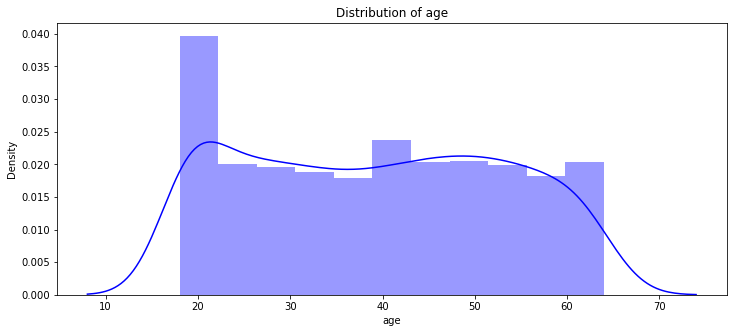

In [65]:
plt.figure(figsize=(12,5)) # distribution of ages
plt.title("Distribution of age")
ax = sns.distplot(med_df["age"], color = 'b')

The minimum age is around 18 years and maximun is around 64 years

## Statistical summary of the dataset

In [22]:
med_df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


<AxesSubplot:>

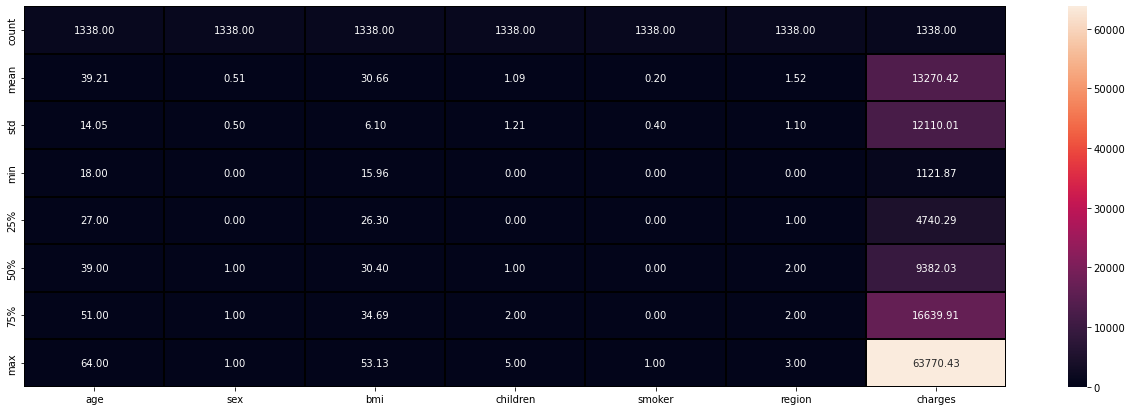

In [23]:
plt.figure(figsize=(22,7))
sns.heatmap(med_df.describe(),annot=True,linewidth=0.1,linecolor='black',fmt='0.2f')

# Correlation of the colums with the target columns


In [24]:
med_df.corr()['charges'].sort_values() # checking the relationship between the independent variable and the target variable

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

<AxesSubplot:>

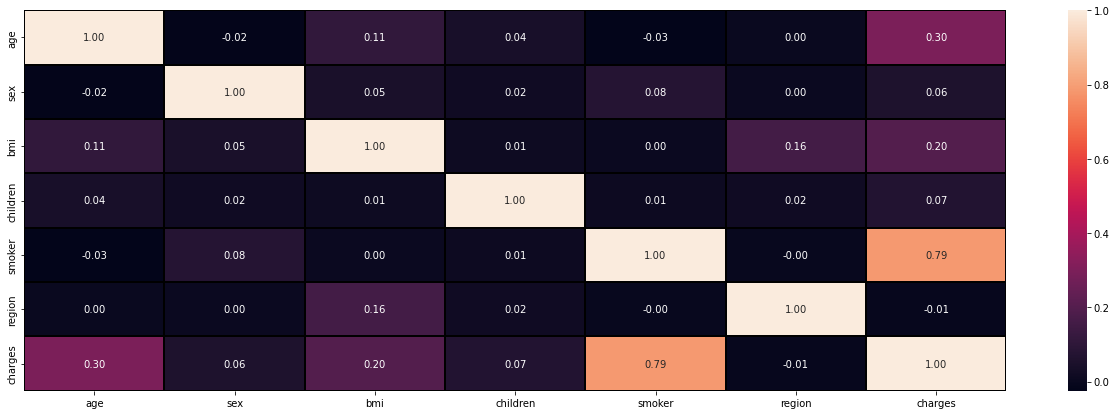

In [25]:
plt.figure(figsize=(22,7))
sns.heatmap(med_df.corr(),annot=True,linewidths =0.1, linecolor='black',fmt='0.2f')

checking the columns which are positively and negatively correlated with target column

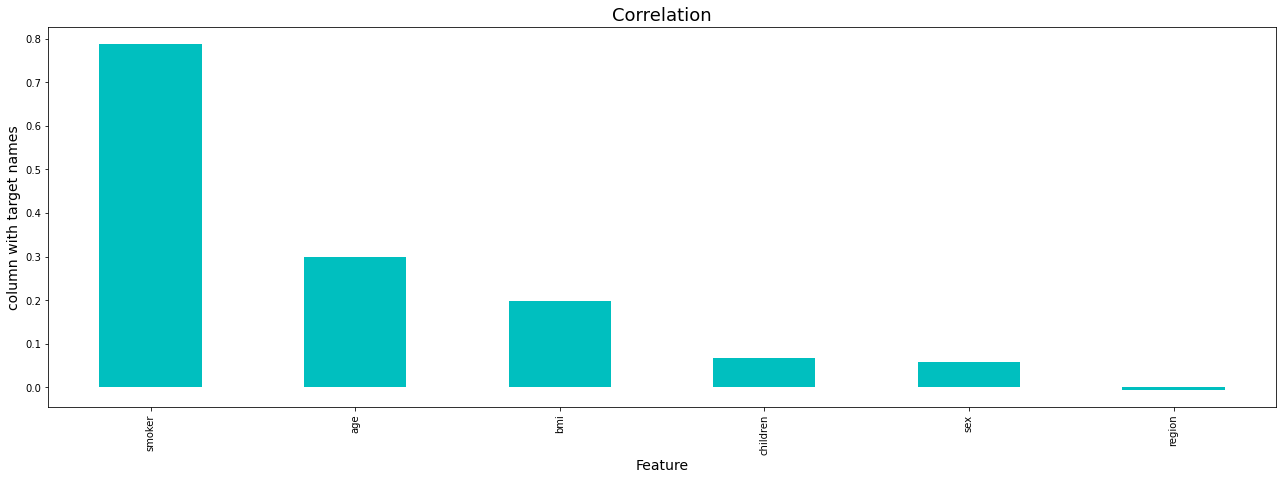

In [26]:
plt.figure(figsize=(22,7))
med_df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize = 18)
plt.show()

# Checking skewness

In [27]:
med_df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

range of skewness is kept at +/-0.5, and colums which do not lie within this range are:
1. smoker - categorical
2. children - categorical
3. charges - target variable

since all are categorical, mean cannot be relied on so we will not threat them 

# checking the outliers on the columns

In [28]:
med_df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

<AxesSubplot:>

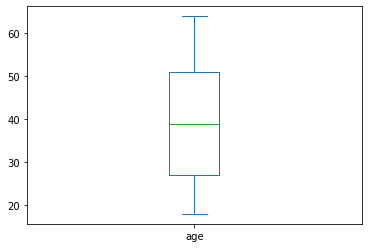

In [29]:
med_df['age'].plot.box()

<AxesSubplot:>

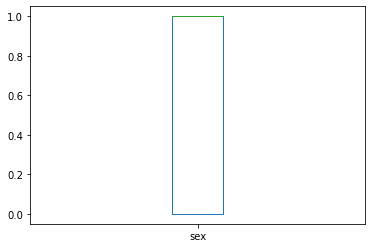

In [30]:
med_df['sex'].plot.box()

<AxesSubplot:>

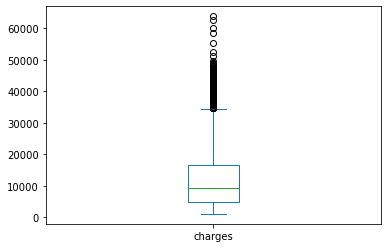

In [31]:
med_df['charges'].plot.box()

<AxesSubplot:>

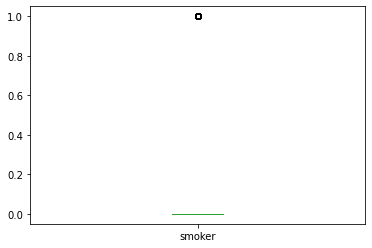

In [32]:
med_df['smoker'].plot.box()

<AxesSubplot:>

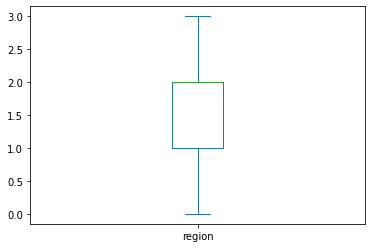

In [33]:
med_df['region'].plot.box()

<AxesSubplot:>

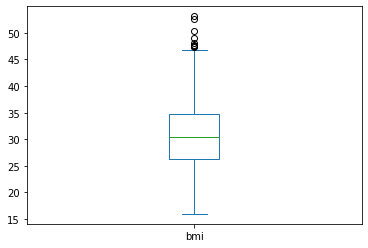

In [34]:
med_df['bmi'].plot.box()

<AxesSubplot:>

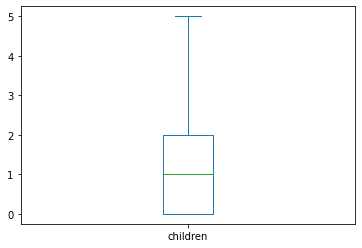

In [35]:
med_df['children'].plot.box()

In [36]:
med_df['bmi'].unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [37]:
med_df['smoker'].unique() #cheching the unique values of smoker column

array([1., 0.])

From the boxplots above bmi, smoker and charges column have some outliers, but we will ignore smoker and charges since smoker is a categorical column and charges is our target column. we will deal with bmi

# Removing outliers

In [39]:
med_df.shape

(1338, 7)

In [41]:
z = np.abs(zscore(med_df))
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [43]:
med_df_new = med_df[(z<3).all(axis = 1)]
med_df_new

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


## Percentage data loss

In [47]:
Data_loss = ((1338 - 1309)/1338)*100
Data_loss

2.167414050822123

outliers will not be removed since most of the colums with outliers are categorical data and the target column

### Splitting the dataset into features and target

In [71]:
x = med_df.drop('charges',axis=1)
y = med_df['charges']

### Scaling the data and fitting a machine learning  model

In [78]:
mms = MinMaxScaler()
lr = LinearRegression()

In [80]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state =i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print('\n')

At random state 0, the training accuracy is:- 0.7368306228430944
At random state 0, the testing accuracy is:- 0.7998747145449959


At random state 1, the training accuracy is:- 0.7475615631933097
At random state 1, the testing accuracy is:- 0.7623224022563388


At random state 2, the training accuracy is:- 0.7519923667088932
At random state 2, the testing accuracy is:- 0.7445422986536503


At random state 3, the training accuracy is:- 0.7530732192579027
At random state 3, the testing accuracy is:- 0.7406256738597918


At random state 4, the training accuracy is:- 0.7605730367332922
At random state 4, the testing accuracy is:- 0.697009948917221


At random state 5, the training accuracy is:- 0.7427518003973261
At random state 5, the testing accuracy is:- 0.7790865933969187


At random state 6, the training accuracy is:- 0.7433828393740967
At random state 6, the testing accuracy is:- 0.7785295914318422


At random state 7, the training accuracy is:- 0.7465780121439667
At random state 7, 

At random state 73, the training accuracy is:- 0.7600276697017112
At random state 73, the testing accuracy is:- 0.7125501410188311


At random state 74, the training accuracy is:- 0.7552340269469757
At random state 74, the testing accuracy is:- 0.7321129831800581


At random state 75, the training accuracy is:- 0.7475842998873623
At random state 75, the testing accuracy is:- 0.7640309975597734


At random state 76, the training accuracy is:- 0.7481202170717707
At random state 76, the testing accuracy is:- 0.7605016434634551


At random state 77, the training accuracy is:- 0.7509948897872426
At random state 77, the testing accuracy is:- 0.7478473353232034


At random state 78, the training accuracy is:- 0.7546801388870505
At random state 78, the testing accuracy is:- 0.7324169810915189


At random state 79, the training accuracy is:- 0.752779857016421
At random state 79, the testing accuracy is:- 0.7400442323761762


At random state 80, the training accuracy is:- 0.7505199633940698
At r

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11)

In [82]:
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
pred_test = lr.predict(x_test)

In [84]:
print(r2_score(y_test,pred_test))

0.7993819717035825


### Cross validation of the model

In [87]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

for i in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=i)
    cv_mean = cv_score.mean()
    print(f" At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy for the testing is {test_accuracy}")
    print('\n')

 At cross fold 2 the cv score is 0.7486033254037108 and accuracy score for training is -0.8138563144651714 and accuracy for the testing is 0.7993819717035825


 At cross fold 3 the cv score is 0.7448455049684157 and accuracy score for training is -0.8138563144651714 and accuracy for the testing is 0.7993819717035825


 At cross fold 4 the cv score is 0.7465374465214437 and accuracy score for training is -0.8138563144651714 and accuracy for the testing is 0.7993819717035825


 At cross fold 5 the cv score is 0.7472559473580954 and accuracy score for training is -0.8138563144651714 and accuracy for the testing is 0.7993819717035825


 At cross fold 6 the cv score is 0.7458863313669323 and accuracy score for training is -0.8138563144651714 and accuracy for the testing is 0.7993819717035825


 At cross fold 7 the cv score is 0.745299186058202 and accuracy score for training is -0.8138563144651714 and accuracy for the testing is 0.7993819717035825


 At cross fold 8 the cv score is 0.743063

The number of folds do not change the accuracy and cv_score, so cv=7 is selected

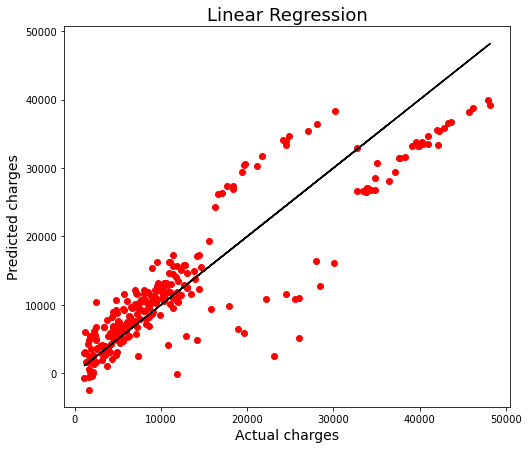

In [103]:
plt.figure(figsize =(8,7))
plt.scatter(x=y_test,y=pred_test, color ='r')
plt.plot(y_test,y_test, color ='black')
plt.xlabel('Actual charges', fontsize=14)
plt.ylabel('Predicted charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.savefig('MLmodel.png')
plt.show()

### Regularlization

In [106]:
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10], 'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [107]:
ls = Lasso(alpha=10, random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train, y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

73.88722293361825

In [108]:
pred_ls = ls.predict(x_train)

In [109]:
lss = r2_score(y_train,pred_ls)
lss*100

73.88722293361825

In [114]:
cv_score = cross_val_score(ls,x,y,cv=7)
cv_mean = cv_score.mean()
cv_mean*100

74.53697580982029

### Hyperparameter tunning

In [116]:
parameters = {'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}

rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [121]:
rf = RandomForestRegressor(criterion='mae',max_features='log2')
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test, pred_decision)
print('R2_score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc = rfscore.mean()
print('cross val:', rfc*100)

R2_score: 87.00043842467299
cross val: 84.11869094966494


Final r2_score is 87% and cross validation is 84%

In [123]:
import pickle #saving the model
filename = 'medical_cost.pkl'
pickle.dump(rf,open(filename, 'wb'))

### Conclusion

In [126]:
load_model = pickle.load(open('medical_cost.pkl','rb'))
result = load_model.score(x_test,y_test)
result*100

87.00043842467299

In [128]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','original'])

In [129]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,33926.590932,4622.165958,7976.816597,8834.126499,10813.667964,14432.443029,6652.948685,15198.609201,15471.693005,39352.423525,...,3374.504189,7797.541596,7075.179483,7654.397766,3879.839006,7075.480699,6394.053238,2216.623866,6838.76863,11491.864316
original,33926.590932,4622.165958,7976.816597,8834.126499,10813.667964,14432.443029,6652.948685,15198.609201,15471.693005,39352.423525,...,3374.504189,7797.541596,7075.179483,7654.397766,3879.839006,7075.480699,6394.053238,2216.623866,6838.76863,11491.864316
